In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [3]:
import pandas as pd
data=pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Predictors--**Label**

In [6]:
feature_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=data[feature_cols]
Y=data['Outcome']

# **Normalization**

In [7]:
X_norm=X.apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [8]:
X_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# Splitting ***data***

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalisation des features
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)  # X vient de data[feature_cols]

# Division en jeu d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.25, random_state=42)


# One hot ***encoding***

t7awalehom kol 0 et 1 les features (0->le et 1->ey)

In [12]:
# One-hot encoding de Y_train
onehot = pd.get_dummies(Y_train)
target_labels = onehot.columns
Y_train = np.array(onehot)

# One-hot encoding de Y_test
onehot= pd.get_dummies(Y_test)
target_labels = onehot.columns
Y_test = np.array(onehot)


In [13]:
Y_test

array([[ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [Fal

nbre de colonnes

In [14]:
X_train.shape[1]

8

# Create ***Model***

from keras.callbacks import EarlyStopping:Importe la fonction EarlyStopping qui va permettre d’arrêter l’entraînement automatiquement si le modèle ne s’améliore plus.





In [15]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense

# Définir l'early stopping
early_stopping_monitor = EarlyStopping(patience=10) #Crée un objet qui va surveiller la performance du modèle et arrêter
#l’entraînement si la validation ne s’améliore pas pendant 10 époques.

# Nombre de colonnes (features) en entrée
n_cols = X_train.shape[1]

# Création du modèle séquentiel
model = Sequential()  #Initialise un modèle séquentiel, c’est-à-dire un modèle où les couches sont empilées les unes après les autres.

model.add(Dense(100, activation='relu', input_shape=(n_cols,)))#Ajoute une première couche dense avec 100 neurones, fonction d’activation ReLU, et indique la taille des données d’entrée (le nombre de colonnes).
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
#Ajoute plusieurs couches cachées supplémentaires avec différentes tailles (100, 100, 50, 40 neurones), chacune avec la fonction ReLU qui permet au modèle d’apprendre des relations non linéaires
model.add(Dense(2, activation='softmax'))  # Ajoute la couche finale de sortie avec 2 neurones (car on a 2 classes à prédire) et la fonction softmax qui convertit la sortie en probabilités.

# Compilation du modèle adam:l’algorithme qui ajuste les poids du modèle , loss='categorical_crossentropy' est la fonction à minimiser, adaptée aux sorties one-hot encodées,metrics=['accuracy'] signifie qu’on veut suivre la précision (le taux de bonnes prédictions).
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])  # orthographe correcte

# Entraînement du modèle
model.fit(X_train, Y_train,
          validation_split=0.3,
          epochs=100,
          callbacks=[early_stopping_monitor])
#Lance l’entraînement du modèle sur les données X_train et Y_train.validation_split=0.3 signifie que 30% des données d’entraînement seront utilisées pour valider à chaque époque.epochs=100 signifie qu’on peut entraîner jusqu’à 100 fois sur tout le jeu d’entraînement.callbacks=[early_stopping_monitor] dit au modèle d’arrêter l’entraînement automatiquement si le score ne s’améliore pas pendant 10 époques.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6055 - loss: 0.6572 - val_accuracy: 0.7572 - val_loss: 0.5747
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7470 - loss: 0.5196 - val_accuracy: 0.7283 - val_loss: 0.5137
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7703 - loss: 0.4945 - val_accuracy: 0.7630 - val_loss: 0.4776
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8316 - loss: 0.3725 - val_accuracy: 0.7688 - val_loss: 0.4921
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8090 - loss: 0.4488 - val_accuracy: 0.7457 - val_loss: 0.4872
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8078 - loss: 0.3906 - val_accuracy: 0.7341 - val_loss: 0.4896
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8216 - loss: 0.3951 - val_accuracy: 0.7514 - val_loss: 0.4730
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8367 - loss: 0.3635 - val_accuracy: 0.7514 - 

# To **Plot** **

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9954 - loss: 0.0509 - val_accuracy: 0.7630 - val_loss: 0.8070
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9767 - loss: 0.0680 - val_accuracy: 0.7746 - val_loss: 0.8005
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9773 - loss: 0.0674 - val_accuracy: 0.7688 - val_loss: 0.8244
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9889 - loss: 0.0584 - val_accuracy: 0.7688 - val_loss: 0.9730
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9651 - loss: 0.0812 - val_accuracy: 0.7688 - val_loss: 0.8623


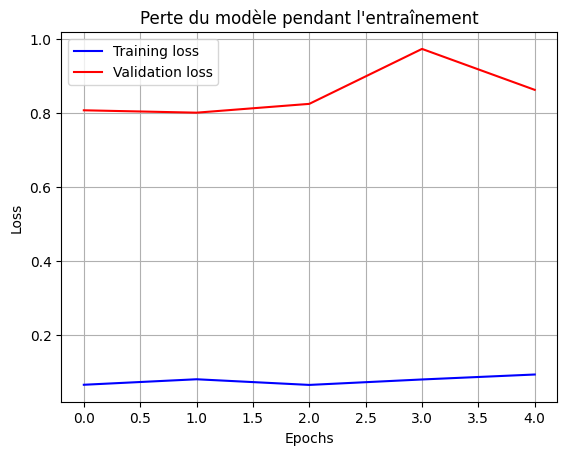

In [17]:
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Early stopping : arrête l'entraînement si la validation ne s'améliore pas pendant 10 epochs
early_stopping_monitor = EarlyStopping(patience=3)

# Entraînement du modèle avec validation et early stopping
model_training = model.fit(
    X_train, Y_train,
    validation_split=0.3,
    epochs=100,
    callbacks=[early_stopping_monitor]
)

# Création du graphique de la perte sur la validation et l'entraînement
plt.plot(model_training.history['loss'], 'b', label='Training loss')
plt.plot(model_training.history['val_loss'], 'r', label='Validation loss')
plt.title('Perte du modèle pendant l\'entraînement')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
model.save('diabetes_MODEL.h5')


# ***Reload***

In [24]:
from keras.models import load_model
model = load_model('diabetes_MODEL.h5')


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            82 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,274 (110.45 KB)

 Trainable params: 28,272 (110.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)